<a href="https://colab.research.google.com/github/seyiberom/data-repository/blob/main/Miniproject2_oluseyi_berom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Mini Project 2

*   Oluseyi Samuel Berom (Oluseyi.Berom@abo.fi)

Date: 15th October 2023

## Introduction

In this Miniproject, our goal is to use two diffrent supervised learning approaches to predicts students final grade in an online course

The two Supervised learning approcahes that I have used are

1. Linear Regression
2. Random Forests

#Import Libraries

In [ ]:
import os
import requests

import seaborn as sns
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import preprocessing, svm
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Load Data and Display first 4

In [ ]:
filename = 'MP2_Data.csv'

if not os.path.exists(filename):
  print("Data not present locally... Fetching....")

  with open(filename,'w', encoding="utf-8") as f:
    url = f"https://raw.githubusercontent.com/seyiberom/data-repository/main/{filename}"
    data = requests.get(url).text
    f.write(data)
df = pd.read_csv(filename, header=[0])
pd.set_option('display.max_columns', None)
df.head()


,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,82.97,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,82.43,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,79.44,4,0,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,80.65,12,0,0,1,30,10,1,6,79,4,2,2,240,27,2,1,47,4,3,1,99,19,4,0,29,4,5,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,67.68,6,0,0,0,0,0,0,0,27,5,0,0,6,15,1,0,32,12,0,8,22,18,1,2,43,4,3,6,8,5,1,1,5,3,1,0,2


# Data Processing
Used the df.describe to generate summary statistics and inspect for any value out of expected range.
#expected scores : peer review 0-5, quiz 0-5, miniproject 1 0-15, miniproject 2 0-20, mnin project 3 0-35,
# check for unusal standard deviation figues All the values were within expected range of minimum and maximum values. However, noted the following have unusual standard deviation which may mean possibility of wrong data or outliers
week8_total       41.03% .   
week3_start0      28.6%.    
week4_start0      47%.     
week5_start0      31.159%.    
week6_start0      47.85%      


In [ ]:


df.describe()


,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.0,107.000000,107.000000,107.00000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,2.406636,7.949626,2.803738,9.237757,2.844673,14.481869,2.383178,2.609439,2.663551,47.380467,6.785047,0.0,0.598131,0.224299,16.88785,13.299065,1.252336,1.841121,31.728972,2.822430,0.953271,1.130841,41.915888,16.046729,1.943925,1.009346,26.074766,5.009346,1.588785,0.663551,37.607477,14.271028,2.775701,0.411215,16.355140,3.242991,1.813084,1.252336,10.514019,3.130841,1.112150,0.355140,7.663551,1.607477,1.093458,0.046729,2.074766
std,2.000317,6.892312,2.493158,8.640610,2.482099,14.080211,2.437501,2.229419,2.414359,41.035589,7.157300,0.0,1.966031,0.730836,16.30796,11.308049,1.505295,4.202761,28.686191,3.206165,2.689544,2.269919,47.164330,17.040675,2.790928,2.806648,31.159269,6.568213,3.954823,1.822003,47.851334,14.009815,7.206271,1.220526,22.242341,5.001587,4.895379,2.399267,15.563846,4.841028,3.658351,1.191577,9.277630,2.687346,3.368928,0.483368,1.993863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,6.50000,10.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.330000,12.000000,5.000000,10.870000,5.000000,15.910000,2.500000,3.170000,4.000000,71.530000,4.000000,0.0,0.000000,0.000000,15.00000,11.000000,1.000000,0.000000,27.000000,4.000000,0.000000,0.000000,27.000000,15.000000,1.000000,0.000000,20.000000,4.000000,0.000000,0.000000,18.000000,15.000000,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,3.000000
75%,4.170000,14.305000,5.000000,18.045000,5.000000,27.440000,5.000000,4.710000,5.000000,83.550000,12.000000,0.0,0.000000,0.000000,24.00000,19.000000,1.000000,2.000000,47.500000,4.000000,0.000000,1.000000,74.500000,27.500000,2.000000,1.000000,40.500000,6.500000,1.000000,0.000000,65.000000,25.000000,2.000000,0.000000,27.000000,5.000000,1.000000,2.000000,14.000000,5.000000,0.000000,0.000000,11.000000,2.000000,0.500000,0.000000,4.000000
max,5.000000,15.000000,5.000000,20.000000,5.000000,35.000000,5.000000,5.000000,5.000000,99.710000,27.000000,0.0,11.000000,6.000000,104.00000,57.000000,10.000000,25.000000,108.000000,15.000000,15.000000,14.000000,240.000000,87.000000,13.000000,24.000000,185.000000,39.000000,23.000000,11.000000,208.000000,51.000000,45.000000,7.000000,145.000000,24.000000,

In [ ]:

#check for missing values
missing_values = df.isna()
print(missing_values)
# our chcek reveal that no value missing


        ID  Week2_Quiz1  Week3_MP1  Week3_PR1  Week5_MP2  Week5_PR2  \
0    False        False      False      False      False      False   
1    False        False      False      False      False      False   
2    False        False      False      False      False      False   
3    False        False      False      False      False      False   
4    False        False      False      False      False      False   
..     ...          ...        ...        ...        ...        ...   
102  False        False      False      False      False      False   
103  False        False      False      False      False      False   
104  False        False      False      False      False      False   
105  False        False      False      False      False      False   
106  False        False      False      False      False      False   

     Week7_MP3  Week7_PR3  Week4_Quiz2  Week6_Quiz3  Week8_Total  Week1_Stat0  \
0        False      False        False        False        False  

In [ ]:
df["Grade"].value_counts()
#df.loc[df["Grade"] == 0,:]



0    48
4    24
3    17
5    13
2     5
Name: Grade, dtype: int64

# Correlation Matrix


<ipython-input-94-576fc1a5e9c8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, square=True, annot=True)


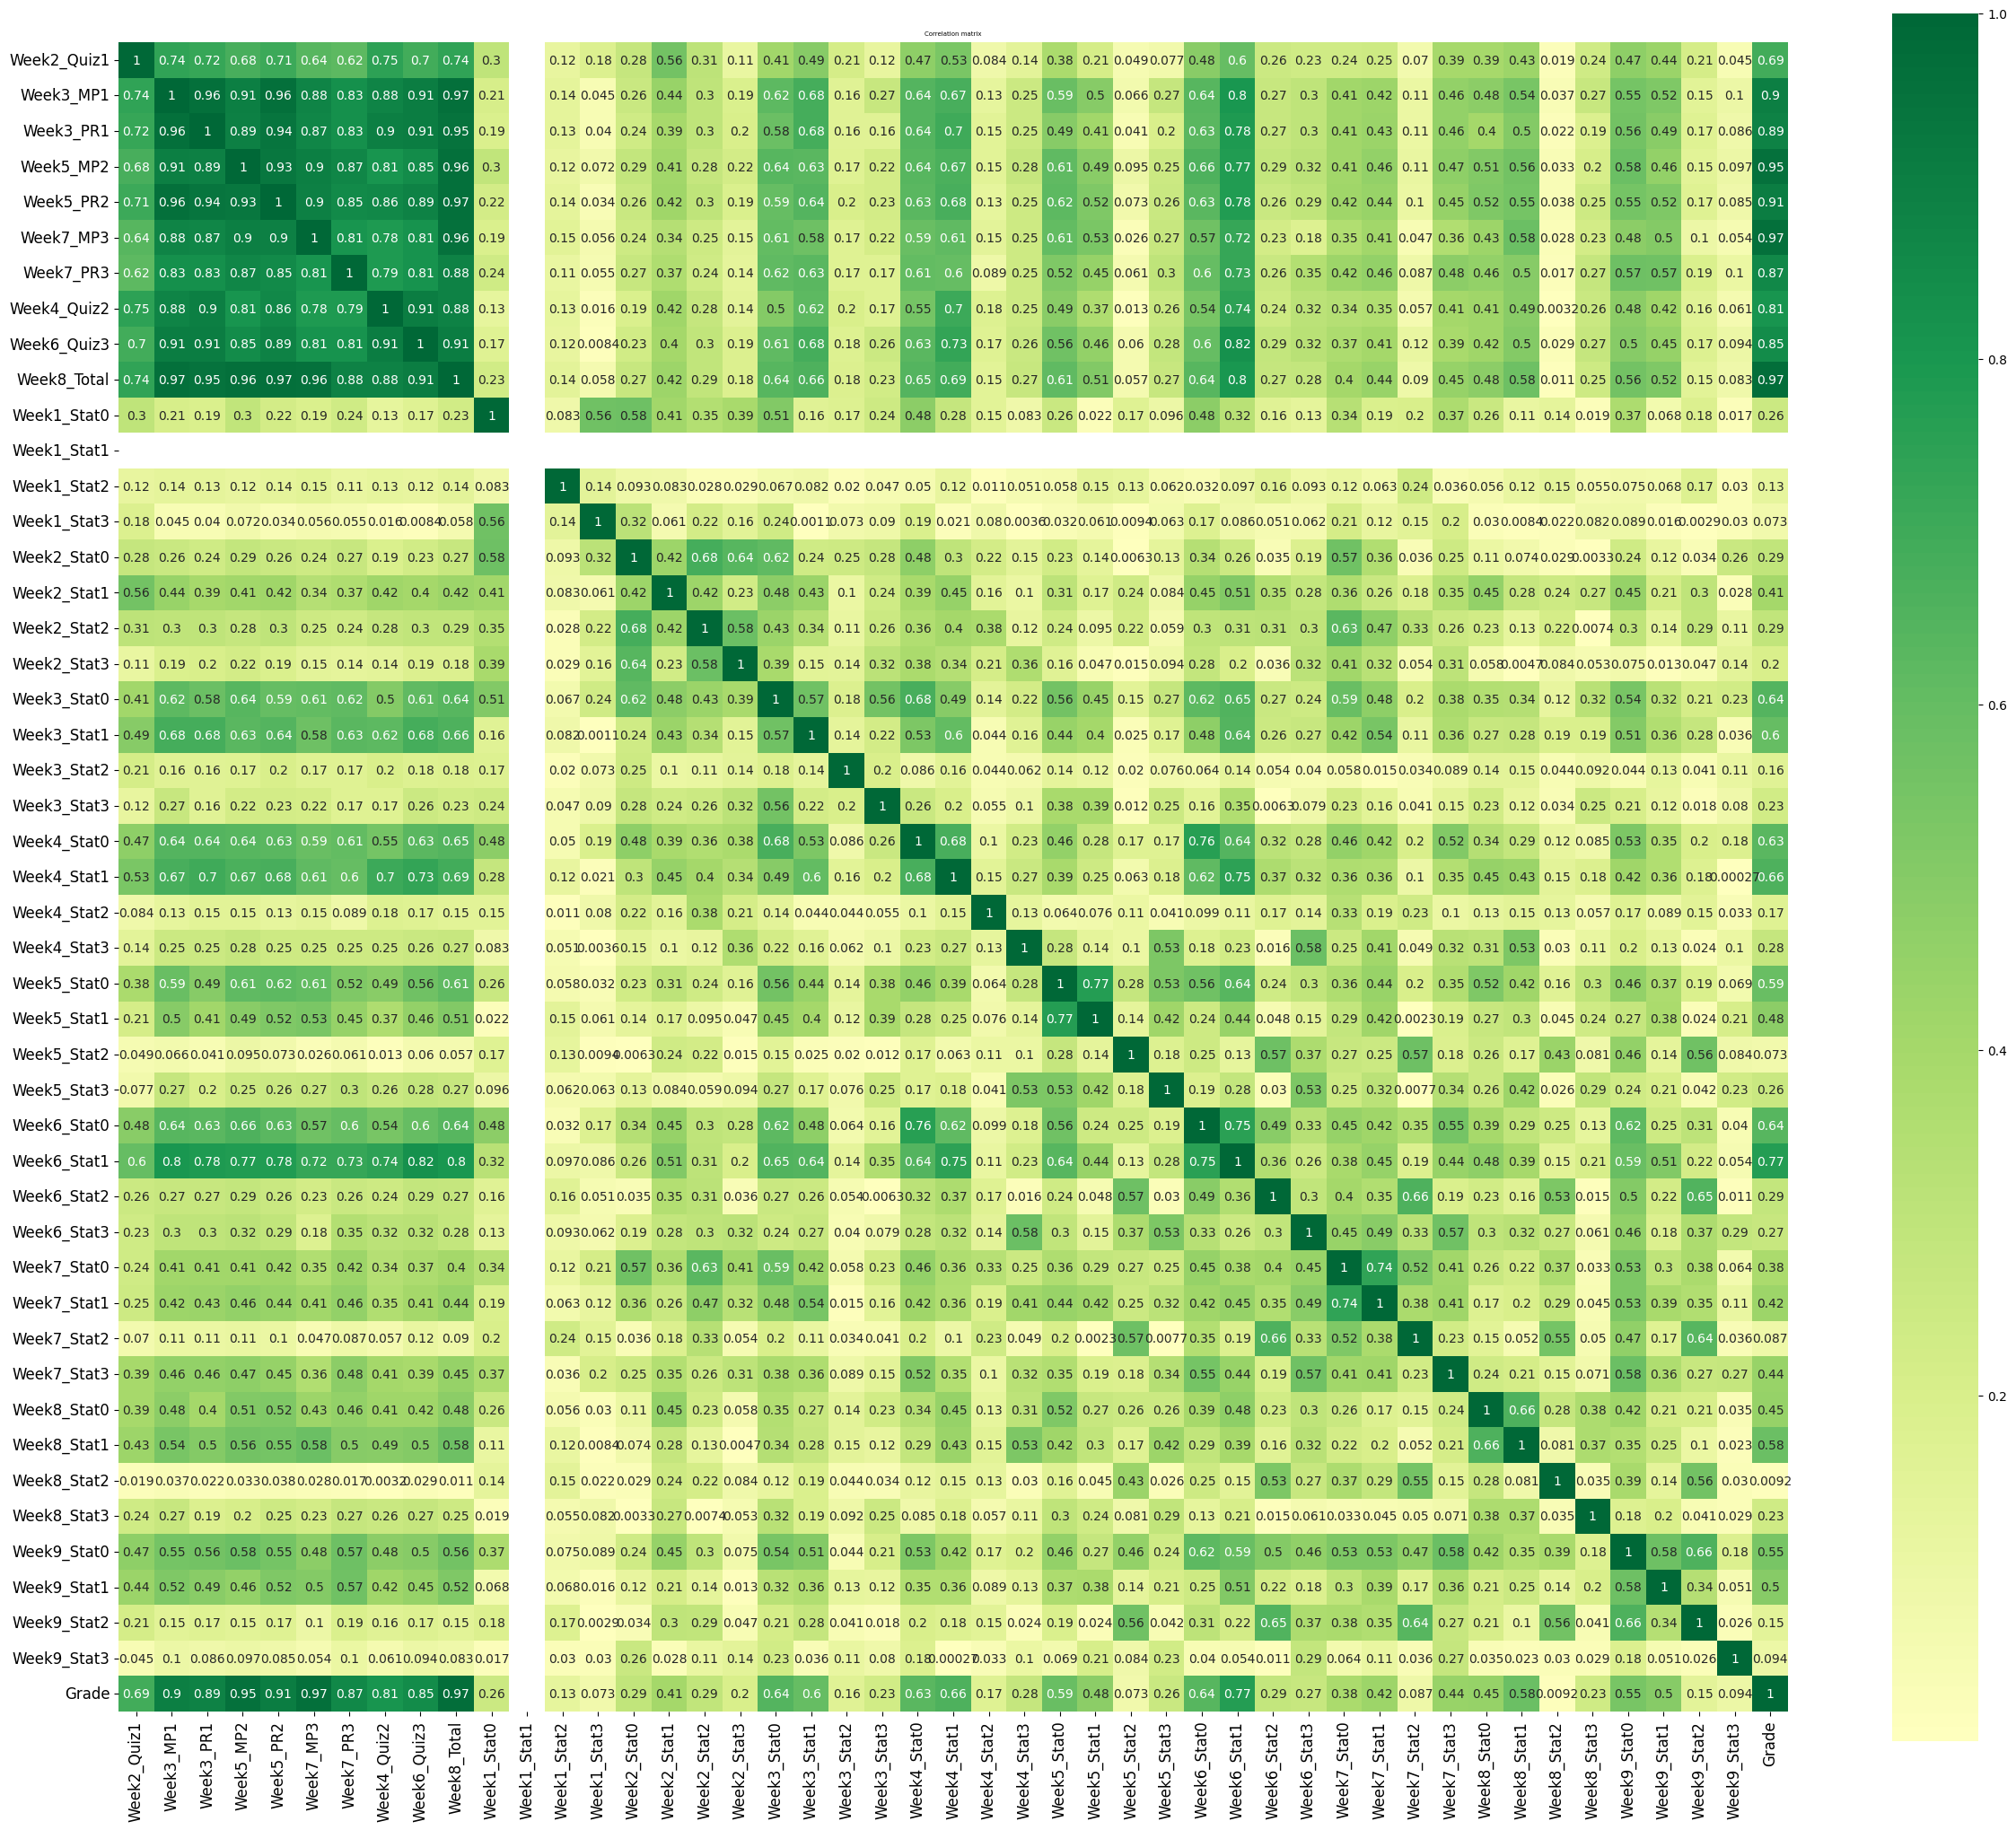

In [ ]:
plt.figure(figsize=(30,25), dpi=100)
sns.heatmap(df.corr().abs(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, square=True, annot=True)

# Decorations
plt.title('Correlation matrix', fontsize=5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()




From the correlation matrix , we can see that the following 25 features have the highest correlation (> 0.4) with Grade are:

Week2_quiz1, Week3_MP1, Week3_PR1,Week5_MP2, Week5_PR2, Week7_MP3, Week7_pr3, Week4_Quiz2, Week6_Quiz3, Week8_Total, Week2_Start1, Week3_Start0, Week3_Start1, Week4_Start0 , Week4_Start1, Week5_Start0, Week5_Start1, Week6_Start0, Week6_Start1, Week7_Start1, Week7_Start3, Week8_Start0, Week8_Start1, Week9_Start0, Week9_Start1

In [ ]:
# We use f-regression test to select the most sutiable features in the dataset
f_df = df.drop(['Grade', 'ID'], axis=1)
X = f_df
y = df.iloc[:, -1]
best_f = SelectKBest(score_func=f_regression, k='all')
fit = best_f.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
fScores = pd.concat([dfcolumns,dfscores],axis=1)
# we check the best 25 scores on the f-regression test
fScores.columns = ['FEATURES','SCORE']
print(fScores.nlargest(25,'SCORE'))


       FEATURES        SCORE
9   Week8_Total  1820.198826
5     Week7_MP3  1568.994204
3     Week5_MP2  1050.605670
4     Week5_PR2   492.161513
1     Week3_MP1   457.165576
2     Week3_PR1   388.869407
6     Week7_PR3   313.811557
8   Week6_Quiz3   273.192556
7   Week4_Quiz2   201.650537
31  Week6_Stat1   154.879069
0   Week2_Quiz1    95.305578
23  Week4_Stat1    82.332027
18  Week3_Stat0    74.322770
30  Week6_Stat0    71.248547
22  Week4_Stat0    67.434598
19  Week3_Stat1    58.093829
26  Week5_Stat0    56.110161
39  Week8_Stat1    54.465934
42  Week9_Stat0    44.488615
43  Week9_Stat1    34.398383
27  Week5_Stat1    32.126800
38  Week8_Stat0    26.781501
37  Week7_Stat3    25.170378
35  Week7_Stat1    23.120800
15  Week2_Stat1    20.738528


We can see therefore from the result of our f-regression test, that our selected 25 features using the correlation matrix also have the higest score

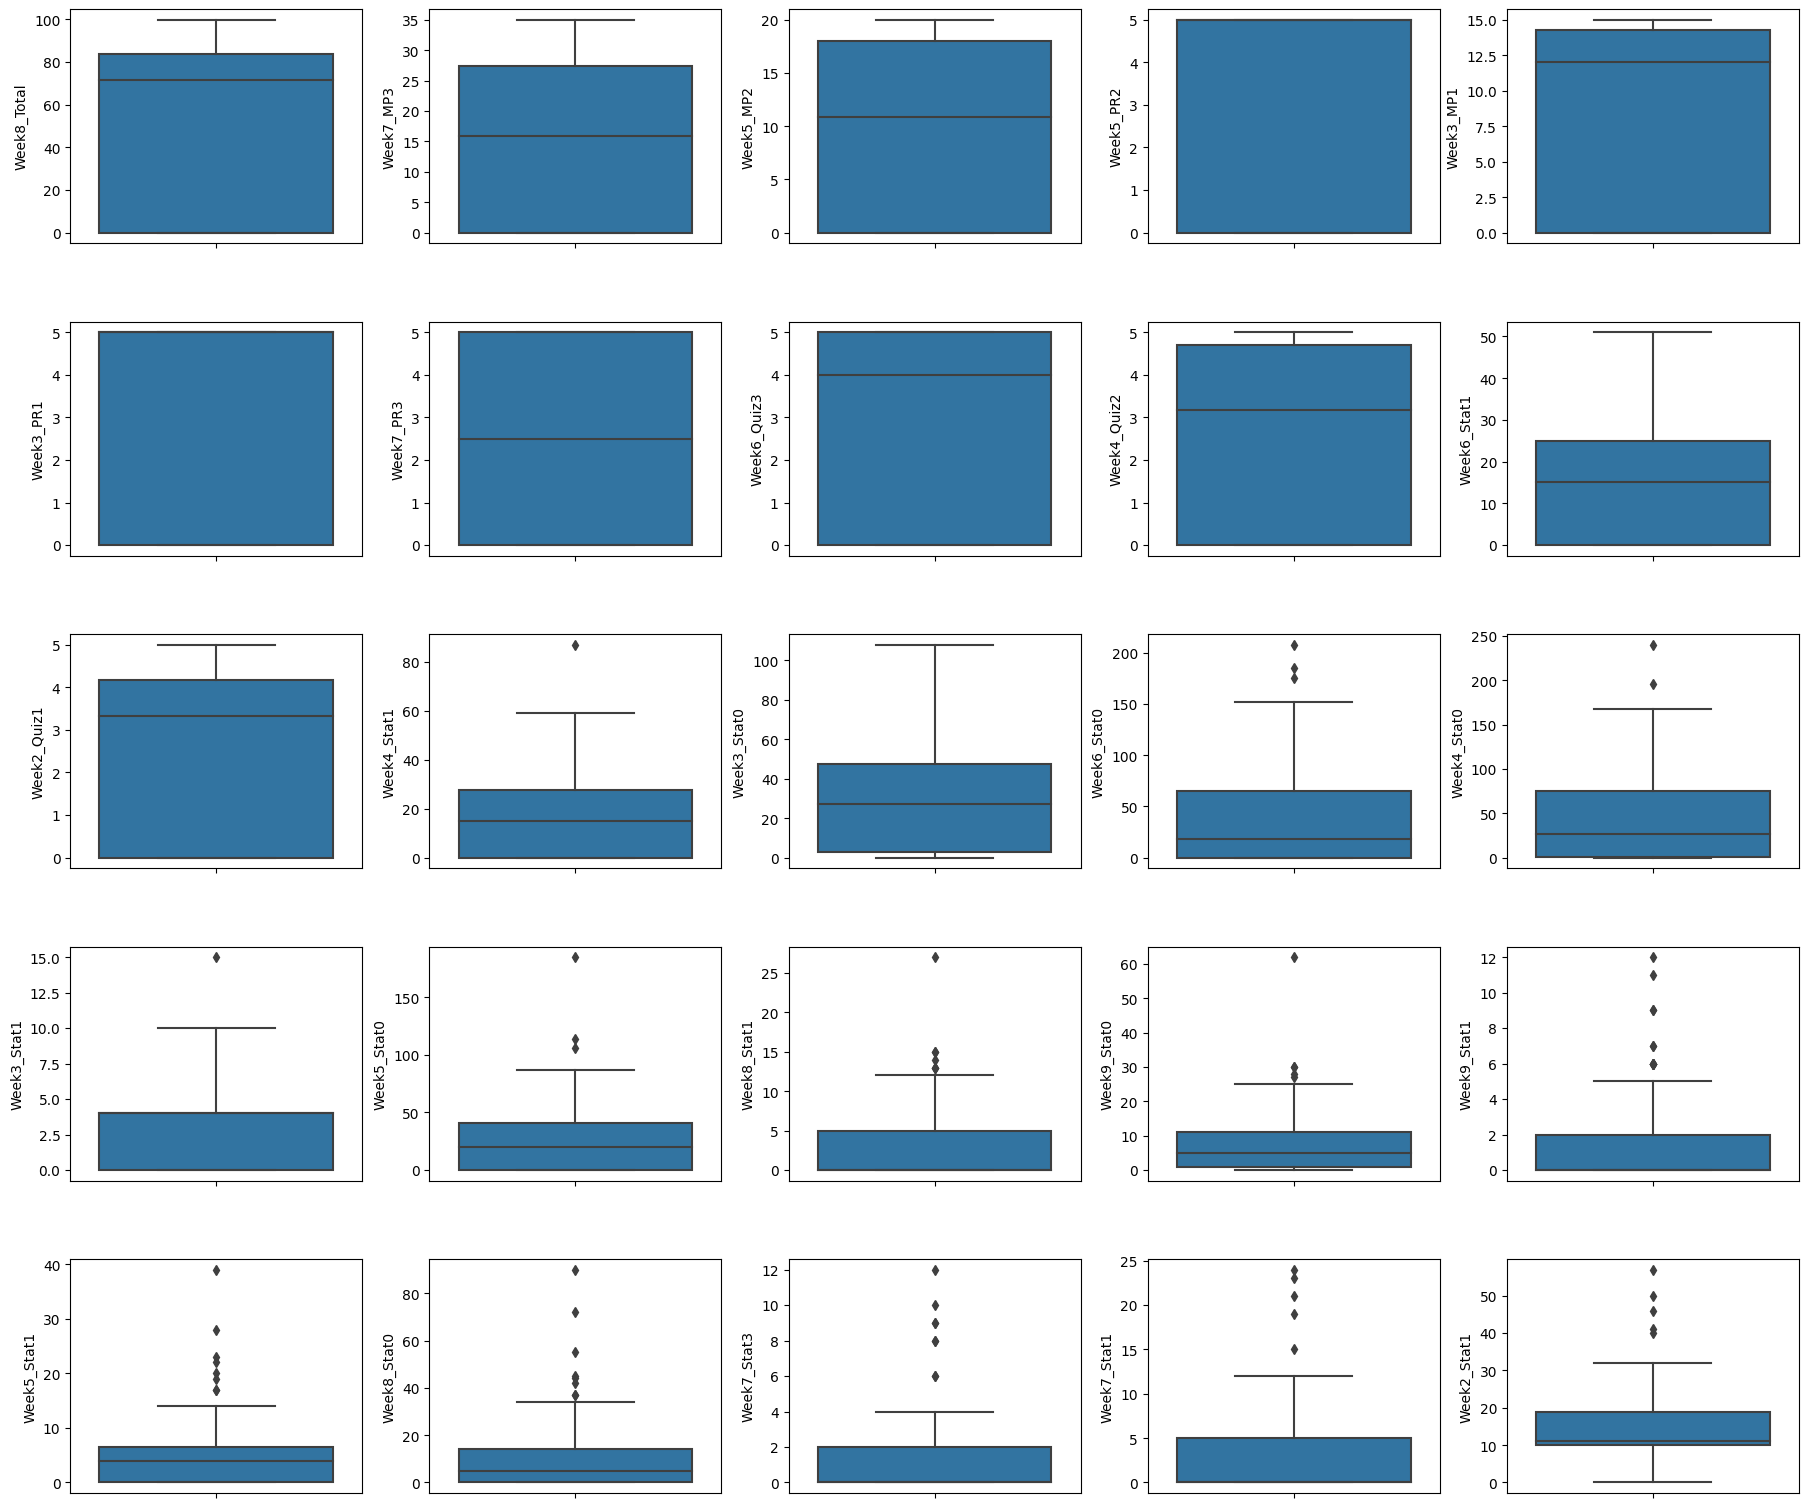

In [ ]:
# We select this 25 as our features for machine learning. We do boxplot to identify possible ouliers and effect necessary correction of data
X = df[['Week8_Total', 'Week7_MP3', 'Week5_MP2','Week5_PR2', 'Week3_MP1', 'Week3_PR1', 'Week7_PR3', 'Week6_Quiz3', 'Week4_Quiz2', 'Week6_Stat1', 'Week2_Quiz1', 'Week4_Stat1', 'Week3_Stat0', 'Week6_Stat0' , 'Week4_Stat0', 'Week3_Stat1',
        'Week5_Stat0', 'Week8_Stat1', 'Week9_Stat0', 'Week9_Stat1', 'Week5_Stat1', 'Week8_Stat0', 'Week7_Stat3', 'Week7_Stat1', 'Week2_Stat1']]
Y = y
fig, axs = plt.subplots(ncols=5, nrows=5, figsize=(18, 15))
index = 0
axs = axs.flatten()
for k,v in X.items():
    sns.boxplot(y=k, data=X, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

We can see that some 13 features have outliers which may affect our model performance.  We must therefore remove the outliers. Therafter we plot the selected features against "Grade" after scaling

# Removing outliers, Scaling and plotting selected features againbst "Grade" section

0      4
1      4
2      3
4      2
5      3
      ..
102    0
103    0
104    0
105    0
106    0
Name: Grade, Length: 88, dtype: int64


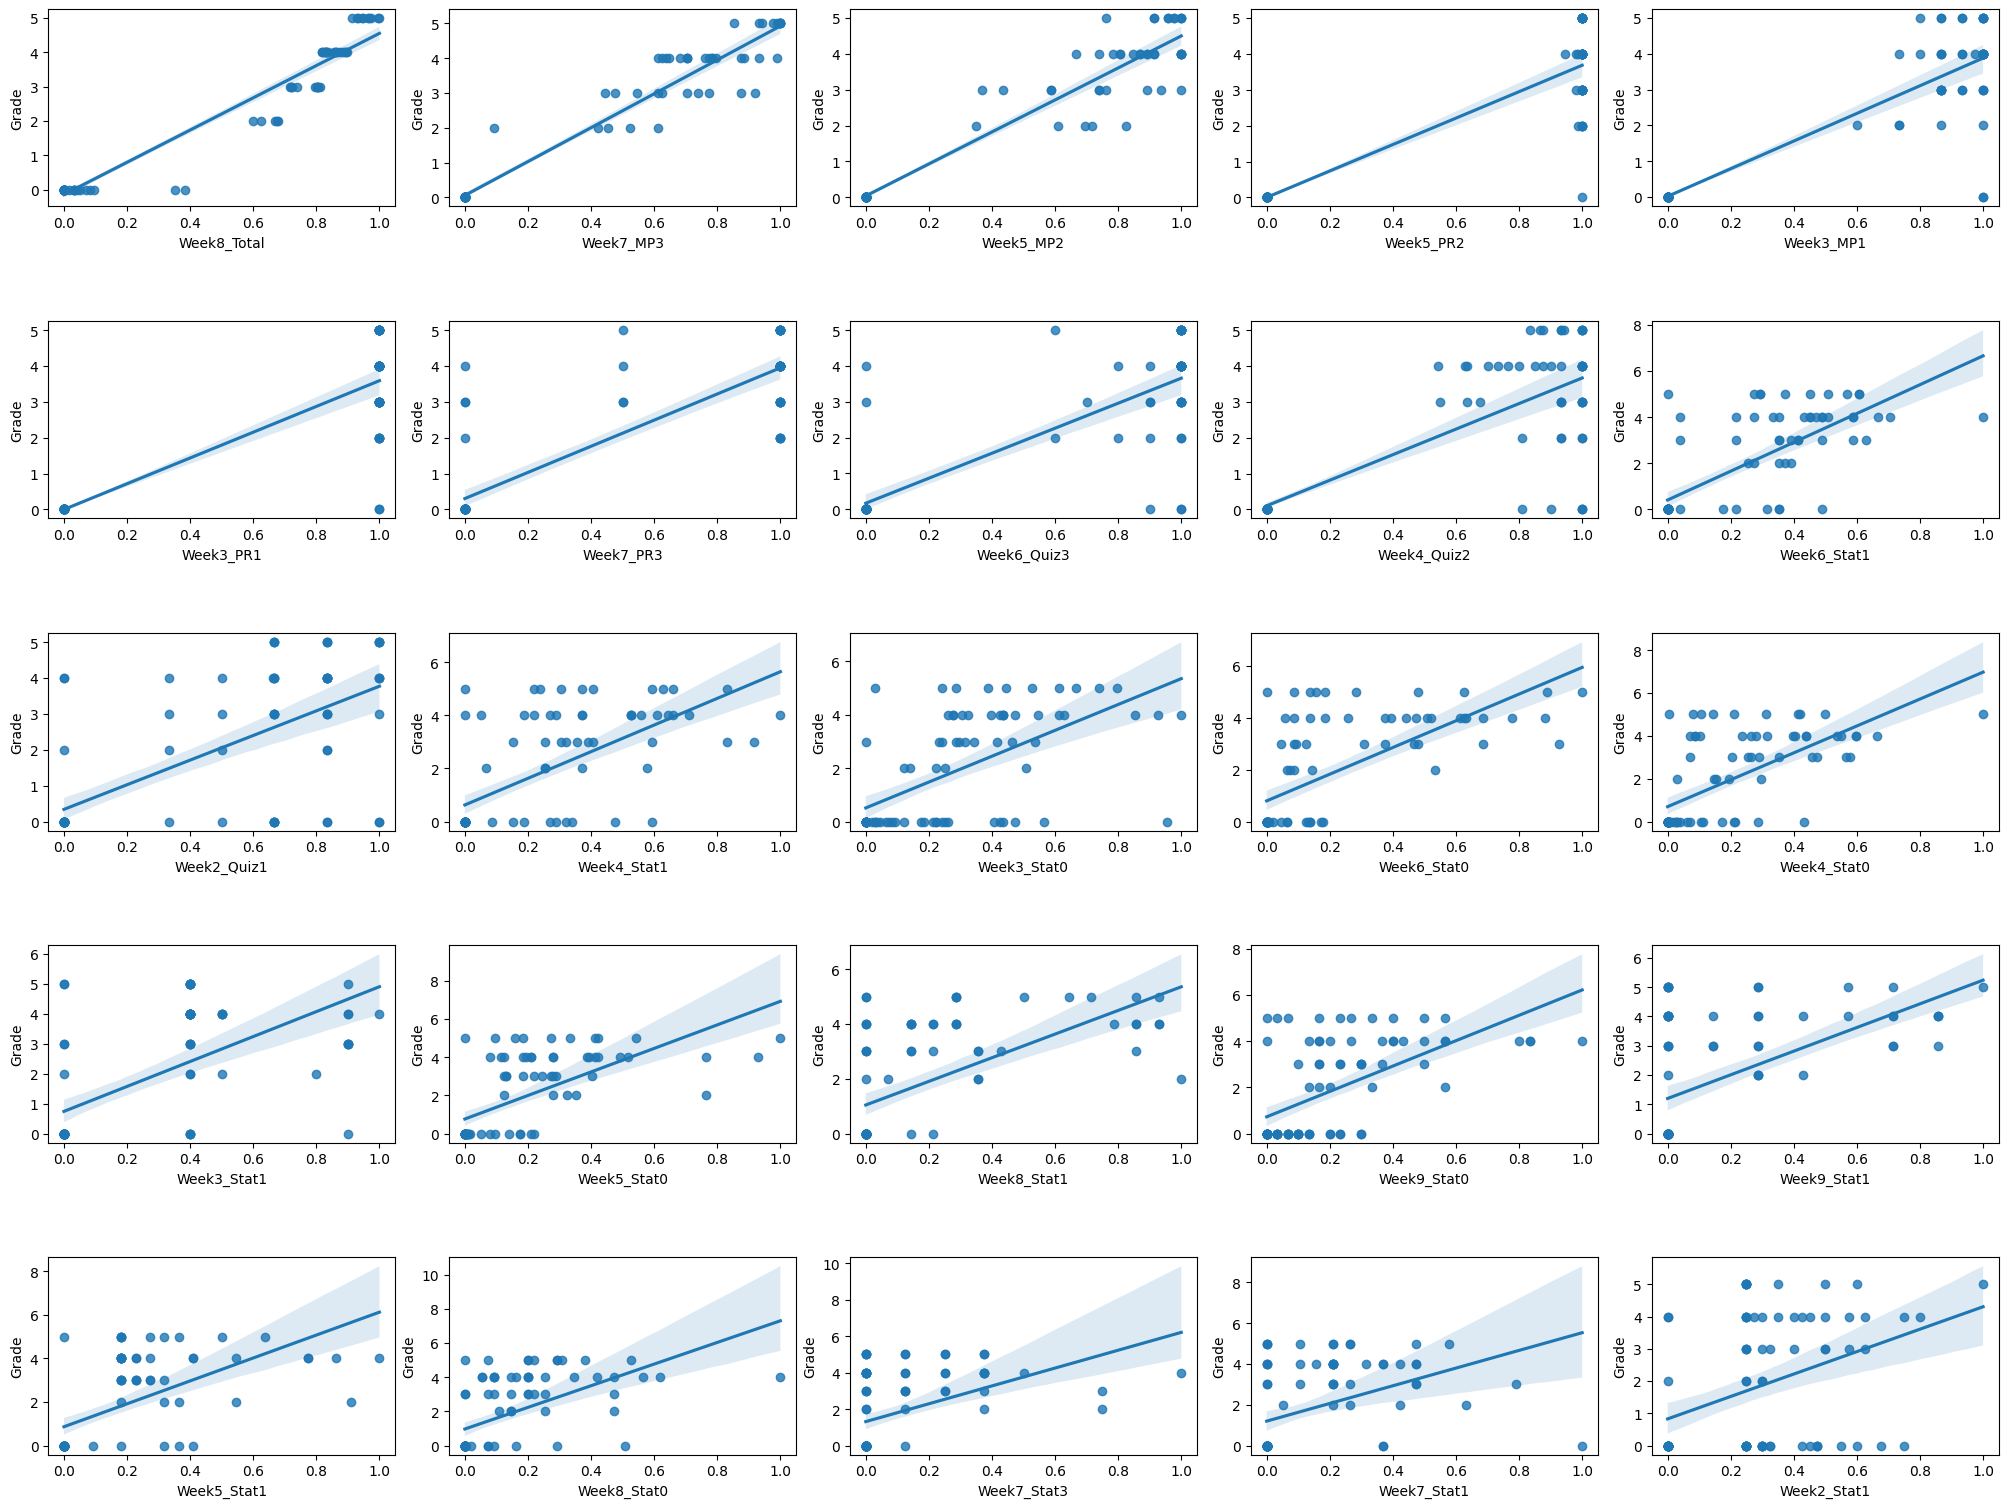

In [ ]:
#remove ouliers
df = df[~((df['Week4_Stat1'] > 80))]
df = df[~((df['Week6_Stat0'] > 170))]
df = df[~((df['Week4_Stat0'] > 220))]
df = df[~((df['Week3_Stat1'] > 12.5))]
df = df[~((df['Week5_Stat0'] > 125))]
df = df[~((df['Week8_Stat1'] > 20))]
df = df[~((df['Week9_Stat0'] > 40))]
df = df[~((df['Week9_Stat1'] > 8))]
df = df[~((df['Week5_Stat1'] > 25))]
df = df[~((df['Week8_Stat0'] > 60))]
df = df[~((df['Week7_Stat3'] > 8))]
df = df[~((df['Week7_Stat1'] > 20))]
df = df[~((df['Week2_Stat1'] > 40))]

X = df[['Week8_Total', 'Week7_MP3', 'Week5_MP2','Week5_PR2', 'Week3_MP1', 'Week3_PR1', 'Week7_PR3', 'Week6_Quiz3', 'Week4_Quiz2', 'Week6_Stat1', 'Week2_Quiz1', 'Week4_Stat1', 'Week3_Stat0', 'Week6_Stat0' , 'Week4_Stat0', 'Week3_Stat1',
        'Week5_Stat0', 'Week8_Stat1', 'Week9_Stat0', 'Week9_Stat1', 'Week5_Stat1', 'Week8_Stat0', 'Week7_Stat3', 'Week7_Stat1', 'Week2_Stat1']]

y = df.iloc[:, -1]

processed_y = y
print(processed_y)
#Scale
min_max_scaler = preprocessing.MinMaxScaler()
f_chosen = X.columns.tolist()
X = pd.DataFrame(data=min_max_scaler.fit_transform(X), columns=f_chosen)
processed_X = X
fig, axs = plt.subplots(ncols=5, nrows=5, figsize=(20, 15))
index = 0
axs = axs.flatten()
for i, k in enumerate(f_chosen):
    sns.regplot(y=y, x=X[k], ax=axs[i])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


# Training and Testing the Model
#Training set = 30%, random state = 42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
print("Training Accuracy:",linear_regressor.score(X_train,y_train)*100)
print("Testing Accuracy:",linear_regressor.score(X_test,y_test)*100)
# compare predicted with actual
y_predict = linear_regressor.predict((X_test))
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
print(df2)


Training Accuracy: 99.1631987105172
Testing Accuracy: 97.01481564180085
     Actual  Predicted
95        0  -0.067068
0         4   3.415866
31        5   4.195094
27        3   3.693959
16        4   4.390384
86        0   0.016882
12        5   4.402466
22        4   3.286672
5         3   2.959315
87        0  -0.070597
104       0  -0.073693
84        0  -0.070597
69        3   3.318262
99        0  -0.076902
103       0   0.010351
83        0   0.359884
41        5   4.504035
98        0  -0.078483
71        5   4.806830
92        0  -0.018082
13        5   4.522691
36        5   4.261308
53        4   4.035912
33        0   0.065827
11        0   0.149835
85        0  -0.074540
6         0  -0.072569


In [ ]:
pred_linear = linear_regressor.predict(X_test)

mse_linear = mean_squared_error(y_test, pred_linear)
mae_linear = mean_absolute_error(y_test, pred_linear)
rmse_linear = np.sqrt(mse_linear)

#Accuracy score
r2_linear = r2_score(y_test, pred_linear)


print(f"Mean Squared Error: {mae_linear:.2f}")
print(f"Mean Absolute Error: {mse_linear:.2f}")
print(f"Root Mean Squared Error: {rmse_linear:.2f}")
print(f"R-squared Score: {r2_linear:.2f}")

Mean Squared Error: 0.27
Mean Absolute Error: 0.14
Root Mean Squared Error: 0.38
R-squared Score: 0.97


# Supervised Learning Model using Random Forests
We use the X data sets including the selected 25 features treated for outliers and scaled. The ssame treated data that we used for Regression. We now use same treated data using Random Forest Classifier. This will be the second method of modelling Supervised Learning to predict the Student grade.

In [ ]:
#use the dataframe X with the processed Dataset
#View the top 5 rows
np.random.seed(0)
processed_X.head()

,Week8_Total,Week7_MP3,Week5_MP2,Week5_PR2,Week3_MP1,Week3_PR1,Week7_PR3,Week6_Quiz3,Week4_Quiz2,Week6_Stat1,Week2_Quiz1,Week4_Stat1,Week3_Stat0,Week6_Stat0,Week4_Stat0,Week3_Stat1,Week5_Stat0,Week8_Stat1,Week9_Stat0,Week9_Stat1,Week5_Stat1,Week8_Stat0,Week7_Stat3,Week7_Stat1,Week2_Stat1
0,0.832113,0.625143,0.8045,1.000,1.000000,1.0,1.0,1.0,1.000,0.588235,1.000,0.661017,0.277778,0.184211,0.071429,0.4,0.210526,0.285714,0.266667,0.857143,0.272727,0.090909,0.000,0.000000,0.75
1,0.826697,0.636286,0.8915,1.000,1.000000,1.0,1.0,1.0,0.800,0.431373,0.666,0.271186,0.925926,0.375000,0.663265,0.4,0.421053,0.142857,0.833333,0.428571,0.863636,0.090909,1.000,0.473684,0.25
2,0.796710,0.772857,0.7610,1.000,0.866667,1.0,0.5,1.0,1.000,0.392157,0.334,0.322034,0.231481,0.092105,0.255102,0.4,0.245614,0.142857,0.300000,0.000000,0.272727,0.145455,0.000,0.210526,0.25
3,0.678768,0.454571,0.6085,0.986,1.000000,1.0,1.0,1.0,0.934,0.352941,0.000,0.254237,0.250000,0.144737,0.030612,0.5,0.280702,0.357143,0.166667,0.428571,0.545455,0.145455,0.750,0.210526,0.00
4,0.719988,0.443143,0.7390,1.000,0.933333,1.0,1.0,0.9,0.934,0.411765,0.666,0.355932,0.462963,0.467105,0.576531,0.0,0.280702,0.000000,0.233333,0.285714,0.227273,0.218182,0.375,0.473684,0.30


In [ ]:
#Add a new column Grade and print out first 4
processed_y.head()
processed_X['Grade'] = np.array(processed_y)
processed_X.head()

,Week8_Total,Week7_MP3,Week5_MP2,Week5_PR2,Week3_MP1,Week3_PR1,Week7_PR3,Week6_Quiz3,Week4_Quiz2,Week6_Stat1,Week2_Quiz1,Week4_Stat1,Week3_Stat0,Week6_Stat0,Week4_Stat0,Week3_Stat1,Week5_Stat0,Week8_Stat1,Week9_Stat0,Week9_Stat1,Week5_Stat1,Week8_Stat0,Week7_Stat3,Week7_Stat1,Week2_Stat1,Grade
0,0.832113,0.625143,0.8045,1.000,1.000000,1.0,1.0,1.0,1.000,0.588235,1.000,0.661017,0.277778,0.184211,0.071429,0.4,0.210526,0.285714,0.266667,0.857143,0.272727,0.090909,0.000,0.000000,0.75,4
1,0.826697,0.636286,0.8915,1.000,1.000000,1.0,1.0,1.0,0.800,0.431373,0.666,0.271186,0.925926,0.375000,0.663265,0.4,0.421053,0.142857,0.833333,0.428571,0.863636,0.090909,1.000,0.473684,0.25,4
2,0.796710,0.772857,0.7610,1.000,0.866667,1.0,0.5,1.0,1.000,0.392157,0.334,0.322034,0.231481,0.092105,0.255102,0.4,0.245614,0.142857,0.300000,0.000000,0.272727,0.145455,0.000,0.210526,0.25,3
3,0.678768,0.454571,0.6085,0.986,1.000000,1.0,1.0,1.0,0.934,0.352941,0.000,0.254237,0.250000,0.144737,0.030612,0.5,0.280702,0.357143,0.166667,0.428571,0.545455,0.145455,0.750,0.210526,0.00,2
4,0.719988,0.443143,0.7390,1.000,0.933333,1.0,1.0,0.9,0.934,0.411765,0.666,0.355932,0.462963,0.467105,0.576531,0.0,0.280702,0.000000,0.233333,0.285714,0.227273,0.218182,0.375,0.473684,0.30,3


In [ ]:
# create a new colum to generate a random number between 0 anmd 1 and if that value is less than or equal to 0.75,
# then sets the value of that cell as True, or False otherwise
processed_X['is_train'] = np.random.uniform(0,1, len(X)) <= 0.75

# see the top 5 rows
processed_X.head()


,Week8_Total,Week7_MP3,Week5_MP2,Week5_PR2,Week3_MP1,Week3_PR1,Week7_PR3,Week6_Quiz3,Week4_Quiz2,Week6_Stat1,Week2_Quiz1,Week4_Stat1,Week3_Stat0,Week6_Stat0,Week4_Stat0,Week3_Stat1,Week5_Stat0,Week8_Stat1,Week9_Stat0,Week9_Stat1,Week5_Stat1,Week8_Stat0,Week7_Stat3,Week7_Stat1,Week2_Stat1,Grade,is_train
0,0.832113,0.625143,0.8045,1.000,1.000000,1.0,1.0,1.0,1.000,0.588235,1.000,0.661017,0.277778,0.184211,0.071429,0.4,0.210526,0.285714,0.266667,0.857143,0.272727,0.090909,0.000,0.000000,0.75,4,True
1,0.826697,0.636286,0.8915,1.000,1.000000,1.0,1.0,1.0,0.800,0.431373,0.666,0.271186,0.925926,0.375000,0.663265,0.4,0.421053,0.142857,0.833333,0.428571,0.863636,0.090909,1.000,0.473684,0.25,4,True
2,0.796710,0.772857,0.7610,1.000,0.866667,1.0,0.5,1.0,1.000,0.392157,0.334,0.322034,0.231481,0.092105,0.255102,0.4,0.245614,0.142857,0.300000,0.000000,0.272727,0.145455,0.000,0.210526,0.25,3,True
3,0.678768,0.454571,0.6085,0.986,1.000000,1.0,1.0,1.0,0.934,0.352941,0.000,0.254237,0.250000,0.144737,0.030612,0.5,0.280702,0.357143,0.166667,0.428571,0.545455,0.145455,0.750,0.210526,0.00,2,True
4,0.719988,0.443143,0.7390,1.000,0.933333,1.0,1.0,0.9,0.934,0.411765,0.666,0.355932,0.462963,0.467105,0.576531,0.0,0.280702,0.000000,0.233333,0.285714,0.227273,0.218182,0.375,0.473684,0.30,3,True


In [ ]:
# create two new dataframes, one woth the training rows, one with the test rows
train, test = processed_X[processed_X['is_train']==True], processed_X[processed_X['is_train']==False]
# how many observations for traing data and test data
print("No of observations - Training data", len(train))
print("No of observations - Test data", len(test))

No of observations - Training data 70
No of observations - Test data 18


In [ ]:
# create a list of the features
features = X.columns[:25]
features
y = train['Grade']
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train[features], y)
#apply the classifier we trained to the test data
predicted_grades = clf.predict(test[features])
print(predicted_grades)



[5 0 5 4 3 4 0 4 3 0 0 0 4 0 0 0 0 0]


In [ ]:
# chcek the predicted probability for the observations
clf.predict_proba(test[features])[0:18]

array([[0.08, 0.09, 0.12, 0.33, 0.38],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.1 , 0.08, 0.14, 0.11, 0.57],
       [0.  , 0.06, 0.23, 0.62, 0.09],
       [0.03, 0.25, 0.4 , 0.2 , 0.12],
       [0.  , 0.09, 0.34, 0.5 , 0.07],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.07, 0.36, 0.42, 0.14],
       [0.24, 0.21, 0.43, 0.09, 0.03],
       [0.5 , 0.25, 0.21, 0.03, 0.01],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.05, 0.17, 0.66, 0.12],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.99, 0.  , 0.01, 0.  , 0.  ]])

In [ ]:
# create a confusion matrix
pd.crosstab(test['Grade'], predicted_grades, rownames=['Actual Grade'], colnames=['Predicted Grade'])



Predicted Grade,0,3,4,5
Actual Grade,,,,
0,10,0,0,0
2,0,1,0,0
3,0,1,1,0
4,0,0,3,1
5,0,0,0,1


In [ ]:
# view list of the features and their importance scores
list(zip(train[features], clf.feature_importances_))


[('Week8_Total', 0.1800288688801347),
 ('Week7_MP3', 0.17090959185322455),
 ('Week5_MP2', 0.11770963519914332),
 ('Week5_PR2', 0.06342905175104592),
 ('Week3_MP1', 0.10145652564564804),
 ('Week3_PR1', 0.033494052933405453),
 ('Week7_PR3', 0.02568939494428976),
 ('Week6_Quiz3', 0.032951953777014896),
 ('Week4_Quiz2', 0.02140584396791383),
 ('Week6_Stat1', 0.01734182301529217),
 ('Week2_Quiz1', 0.013363473603710475),
 ('Week4_Stat1', 0.017758831754707043),
 ('Week3_Stat0', 0.024080975266712202),
 ('Week6_Stat0', 0.01979174236776683),
 ('Week4_Stat0', 0.016077267160972315),
 ('Week3_Stat1', 0.00867679850888582),
 ('Week5_Stat0', 0.020665587296132368),
 ('Week8_Stat1', 0.019273292828664877),
 ('Week9_Stat0', 0.014300788039177812),
 ('Week9_Stat1', 0.010059328732978559),
 ('Week5_Stat1', 0.03399583893775737),
 ('Week8_Stat0', 0.018064952161684685),
 ('Week7_Stat3', 0.004762621402936521),
 ('Week7_Stat1', 0.008371389294540265),
 ('Week2_Stat1', 0.0063403706762602185)]